In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


In [91]:
HOUSING_PATH_FULL='C:/Users/samys/PycharmProjects/HousingPrices/data/Melbourne_housing_FULL.csv'

def load_housing_data(housing_path=HOUSING_PATH_FULL):
    return pd.read_csv(housing_path)

In [92]:
loaded_data = load_housing_data()
loaded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [93]:
train_val_set = loaded_data.dropna(subset=['Price'])
final_test = loaded_data[loaded_data['Price'].isna()]

new_column_names = {'Lattitude': 'Latitude', 'Longtitude': 'Longitude'}
melb_data = train_val_set.rename(columns=new_column_names)

In [94]:
def remove_outliers_iqr_all(df, columns, factor=2):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR
        outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]
        print(f"Number of outliers in {col}: {len(outliers)}")
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

In [95]:
cols = ['Price', 'Rooms', 'Bedroom2', 'Bathroom']
# melb_data = remove_outliers_iqr_all(melb_data, cols)

In [96]:
train_set, test_set = train_test_split(melb_data, test_size=0.2, random_state=42)
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21797 entries, 23012 to 30249
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         21797 non-null  object 
 1   Address        21797 non-null  object 
 2   Rooms          21797 non-null  int64  
 3   Type           21797 non-null  object 
 4   Price          21797 non-null  float64
 5   Method         21797 non-null  object 
 6   SellerG        21797 non-null  object 
 7   Date           21797 non-null  object 
 8   Distance       21796 non-null  float64
 9   Postcode       21796 non-null  float64
 10  Bedroom2       16633 non-null  float64
 11  Bathroom       16627 non-null  float64
 12  Car            16324 non-null  float64
 13  Landsize       14353 non-null  float64
 14  BuildingArea   8535 non-null   float64
 15  YearBuilt      9677 non-null   float64
 16  CouncilArea    21794 non-null  object 
 17  Latitude       16796 non-null  float64
 18  Longitu

In [97]:
train_set = remove_outliers_iqr_all(train_set, cols)


train_set['Price'] = np.log1p(train_set['Price'])
test_set['Price'] = np.log1p(test_set['Price'])


Number of outliers in Price: 633
Number of outliers in Rooms: 5
Number of outliers in Bedroom2: 5
Number of outliers in Bathroom: 22


In [98]:
housing = train_set.copy()
numerical_features = train_set.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = train_set.select_dtypes(include=['object']).columns.tolist()

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)


Numerical features: ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Latitude', 'Longitude', 'Propertycount']
Categorical features: ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Postcode'}>],
       [<Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>],
       [<Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Propertycount'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

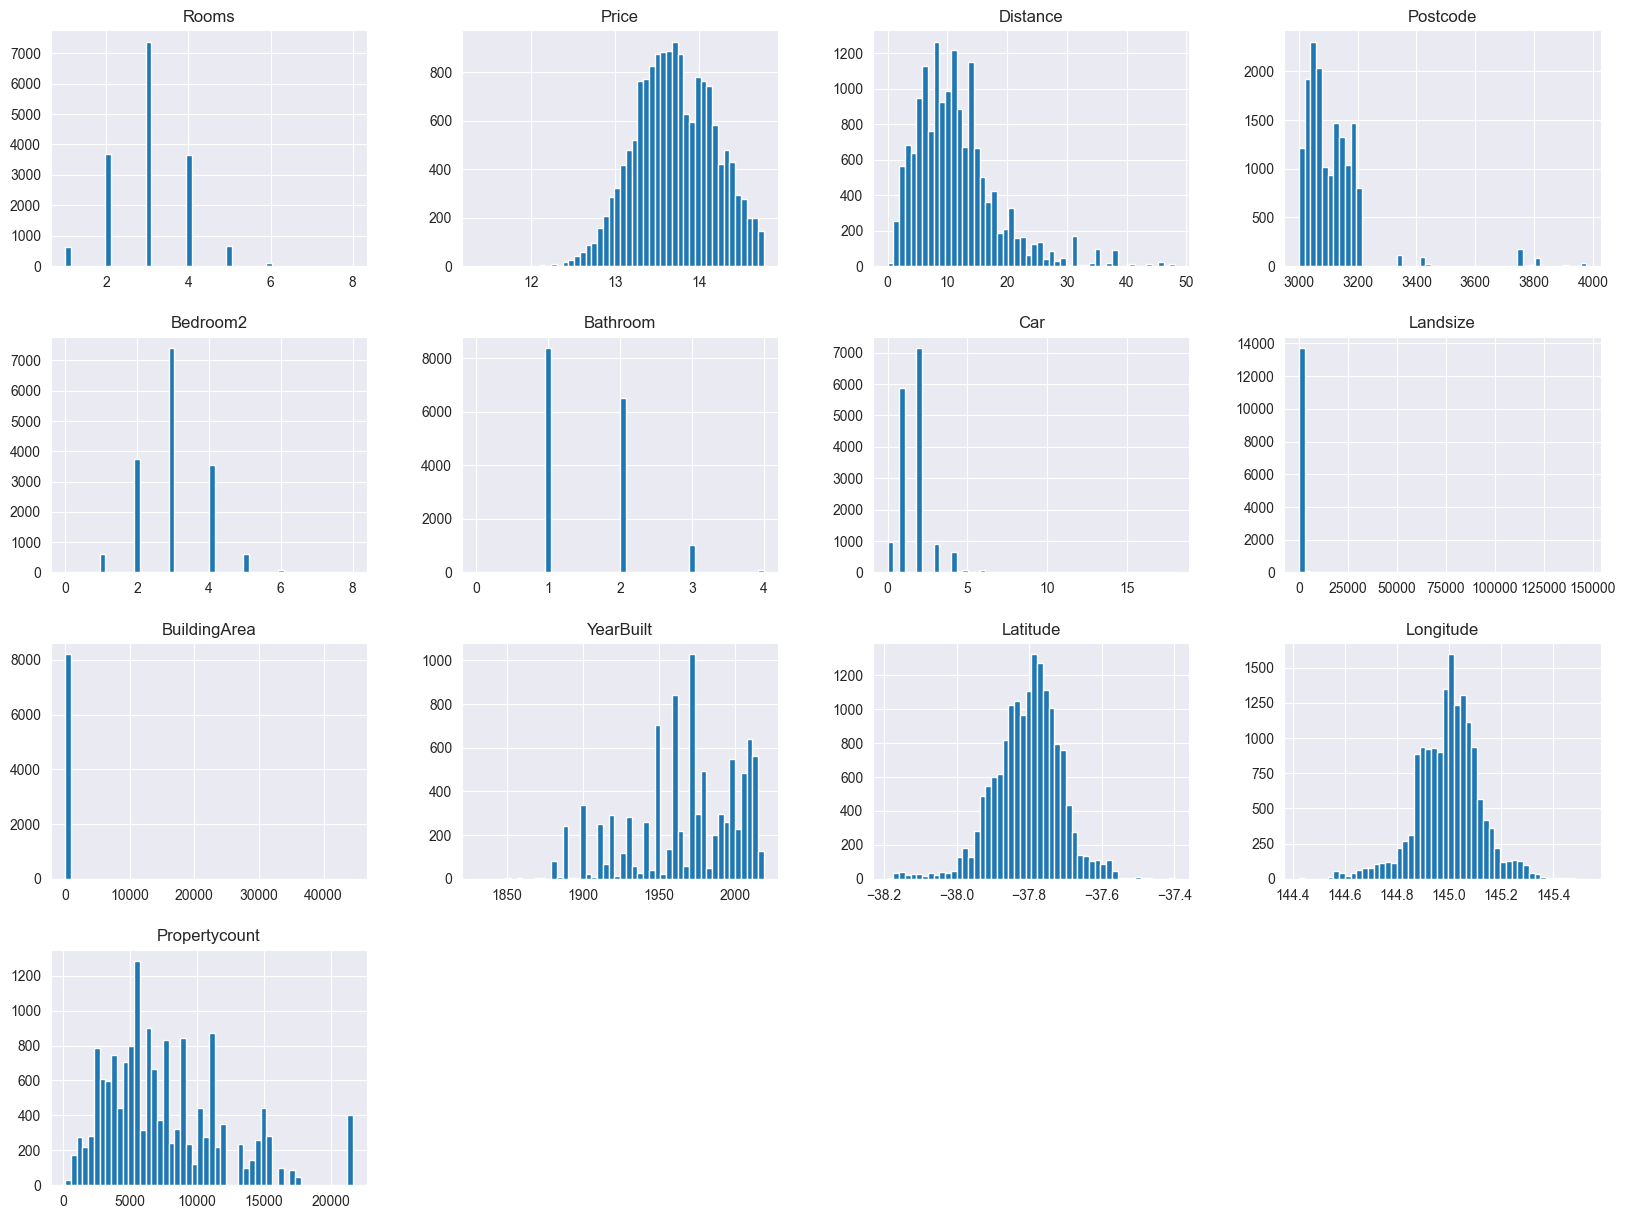

In [99]:
housing_num = housing[numerical_features]
housing.hist(bins=50, figsize=(20, 15))

In [100]:
corr_matrix = housing_num.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price            1.000000
Rooms            0.467003
Bedroom2         0.454470
Bathroom         0.353562
Longitude        0.256682
Car              0.196838
BuildingArea     0.080705
Landsize         0.030034
Postcode         0.000188
Propertycount   -0.083702
Distance        -0.223358
Latitude        -0.231478
YearBuilt       -0.382507
Name: Price, dtype: float64

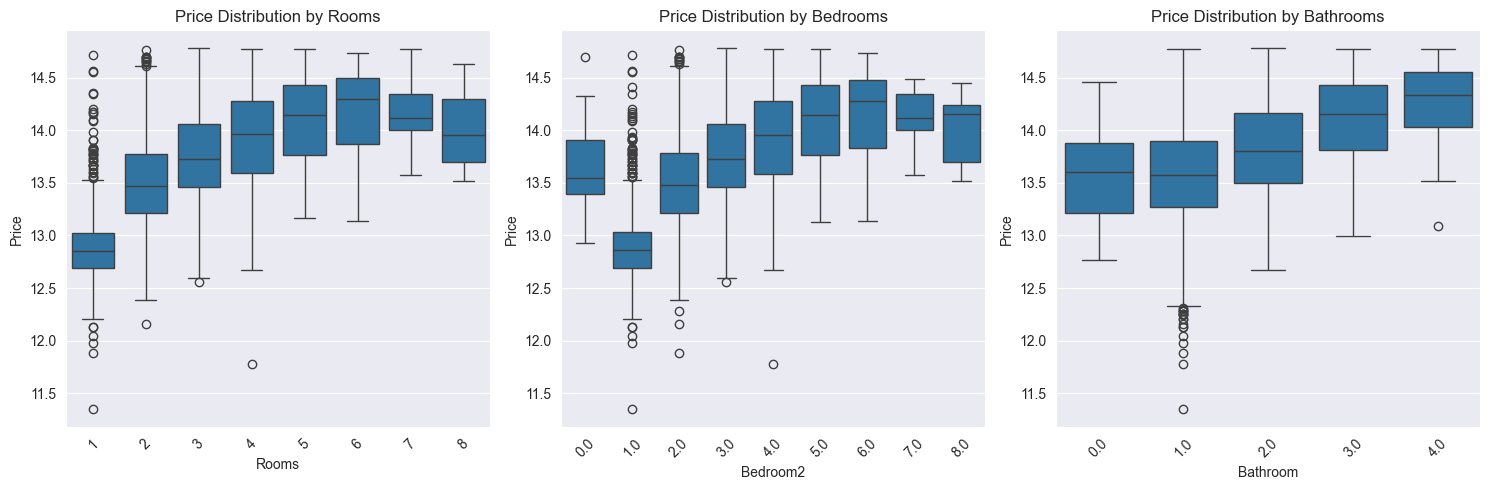

In [101]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Price vs Rooms
sns.boxplot(data=housing, x='Rooms', y='Price', ax=axes[0])
axes[0].set_title('Price Distribution by Rooms')
axes[0].tick_params(axis='x', rotation=45)

# Price vs Bedrooms
sns.boxplot(data=housing, x='Bedroom2', y='Price', ax=axes[1])
axes[1].set_title('Price Distribution by Bedrooms')
axes[1].tick_params(axis='x', rotation=45)

# Price vs Bathrooms
sns.boxplot(data=housing, x='Bathroom', y='Price', ax=axes[2])
axes[2].set_title('Price Distribution by Bathrooms')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()

In [102]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16063 entries, 23012 to 30249
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         16063 non-null  object 
 1   Address        16063 non-null  object 
 2   Rooms          16063 non-null  int64  
 3   Type           16063 non-null  object 
 4   Price          16063 non-null  float64
 5   Method         16063 non-null  object 
 6   SellerG        16063 non-null  object 
 7   Date           16063 non-null  object 
 8   Distance       16063 non-null  float64
 9   Postcode       16063 non-null  float64
 10  Bedroom2       16063 non-null  float64
 11  Bathroom       16063 non-null  float64
 12  Car            15762 non-null  float64
 13  Landsize       13851 non-null  float64
 14  BuildingArea   8209 non-null   float64
 15  YearBuilt      9319 non-null   float64
 16  CouncilArea    16063 non-null  object 
 17  Latitude       16047 non-null  float64
 18  Longitu

In [103]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

drop_cols = ["BuildingArea", "YearBuilt", "Postcode", "Latitude", "Longitude", "Address"]
housing_clean = housing.drop(columns=drop_cols)

important_dropna_cols = ["Distance", "CouncilArea", "Regionname"]
housing_clean = housing_clean.dropna(subset=important_dropna_cols)

median_impute_cols = ["Bedroom2", "Bathroom", "Car", "Landsize"]
mean_impute_cols = ["Propertycount"]

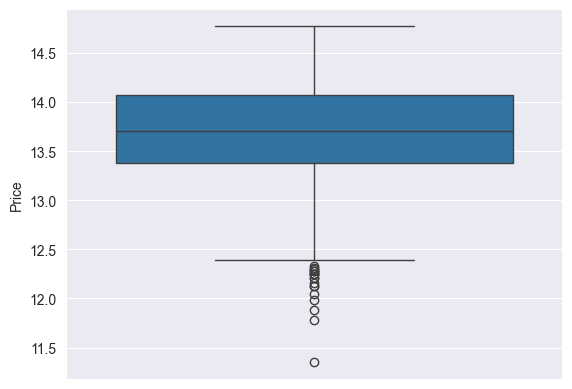

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=housing_clean, y='Price')
plt.show()

In [105]:
from sklearn.preprocessing import OneHotEncoder

median_imputer = SimpleImputer(strategy="median")
mean_imputer = SimpleImputer(strategy="mean")

imputer_transform = ColumnTransformer(transformers=[
    ("median_imputer", median_imputer, median_impute_cols),
    ("mean_imputer", mean_imputer, mean_impute_cols)
],
    remainder="passthrough",
    verbose_feature_names_out=False)

numerical_cols = housing_clean.select_dtypes(include=['int64', 'float64']).columns.drop('Price').tolist()
categorical_cols = housing_clean.drop(columns=numerical_cols + ['Price']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

numeric_transformer = Pipeline(steps=[
    ('imputer_transform', imputer_transform),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])


Numerical columns: ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Propertycount']
Categorical columns: ['Suburb', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


In [106]:
X_train = housing_clean.drop(columns=["Price"])
Y_train = housing_clean["Price"]

X_train_transformed = pipeline.fit_transform(X_train)


In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

test_set_clean = test_set.drop(columns=drop_cols)
test_set_clean = test_set_clean.dropna(subset=important_dropna_cols)


X_test = test_set_clean.drop(columns=["Price"])
Y_test = test_set_clean["Price"]

X_test_transformed = pipeline.transform(test_set_clean)


In [108]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor



In [109]:

models = {
    # 'Linear': LinearRegression(),
    # 'Ridge': Ridge(alpha=1.0),
    # 'Lasso': Lasso(alpha=0.01),
    # 'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    # 'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    # 'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    # 'LightGBM': LGBMRegressor(n_estimators=100, random_state=42),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42)
}




In [110]:
preds = {}

for name, model in models.items():
    model.fit(X_train_transformed, Y_train)
    pred = model.predict(X_test_transformed)
    preds[name] = pred


In [111]:
def print_error(name, y_pred_log):
    print('---------------------------------------------------------\n')
    print(f'Model: {name}')
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(Y_test)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Выводим результаты
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R²: {r2}")

In [112]:
for name, pred in preds.items():
    print_error(name, pred)

---------------------------------------------------------

Model: CatBoost
Mean Absolute Error (MAE): 181437.26212169847
Mean Squared Error (MSE): 134863089369.8332
Root Mean Squared Error (RMSE): 367237.10238731763
R²: 0.6843902949512273


In [113]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# Create scorers for multiple metrics
rmse_scorer = make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Set up k-fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for different metrics
rmse_scores = cross_val_score(models['CatBoost'], X_train_transformed, np.expm1(Y_train),
                              scoring=rmse_scorer, cv=kf)
r2_scores = cross_val_score(models['CatBoost'], X_train_transformed, np.expm1(Y_train),
                            scoring=r2_scorer, cv=kf)
mae_scores = cross_val_score(models['CatBoost'], X_train_transformed, np.expm1(Y_train),
                             scoring='neg_mean_absolute_error', cv=kf)


# Print results
print("Cross-validation results:")
print(f"RMSE scores: {-rmse_scores}")  # Negative because scorer is negative for minimization
print(f"Average RMSE: {-rmse_scores.mean():.4f} (+/- {rmse_scores.std() * 2:.4f})")
print(f"\nR² scores: {r2_scores}")
print(f"Average MAE: {r2_scores.mean():.4f} (+/- {r2_scores.std() * 2:.4f})")
print(f"\nR² scores: {mae_scores}")
print(f"Average MAE: {mae_scores.mean():.4f} (+/- {mae_scores.std() * 2:.4f})")


Cross-validation results:
RMSE scores: [203078.97582083 202652.37290964 205190.62075491 205228.90529769
 203093.87795469]
Average RMSE: 203848.9505 (+/- 2244.8426)

R² scores: [0.82201561 0.83035964 0.8225839  0.81127043 0.8194511 ]
Average R²: 0.8211 (+/- 0.0123)

R² scores: [-142499.84818269 -141643.57290514 -142342.04686853 -139386.80337169
 -140128.10624122]
Average R²: -141200.0755 (+/- 2470.1857)


In [114]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer


def custom_rmse(y_true, y_pred):
    return mean_squared_error(np.expm1(y_true), np.expm1(y_pred), squared=False)

rmse_scorer = make_scorer(custom_rmse, greater_is_better=False)

param_dist = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'iterations': [200, 500, 1000],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

cat = CatBoostRegressor(verbose=0, random_state=42)

search = RandomizedSearchCV(
    cat,
    param_distributions=param_dist,
    n_iter=20,
    scoring=rmse_scorer,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train_transformed, Y_train)

print("Лучшие параметры:", search.best_params_)
print("Лучшее значение RMSE (на CV):", -search.best_score_)


best_model = search.best_estimator_

y_pred_log = best_model.predict(X_test_transformed)

print_error("CatBoost (поиск по сетке)", y_pred_log)




# def rmse_exp(y_true, y_pred):
#     return mean_squared_error(np.expm1(y_true), np.expm1(y_pred), squared=False)
#
# rmse_scorer = make_scorer(rmse_exp, greater_is_better=False)
#
# param_dist = {
#     'depth': [4, 6, 8, 10],
#     'learning_rate': [0.01, 0.03, 0.05, 0.1],
#     'iterations': [200, 500, 1000],
#     'l2_leaf_reg': [1, 3, 5, 7, 9]
# }
#
# cat = CatBoostRegressor(verbose=0, random_state=42)
#
# search = RandomizedSearchCV(
#     estimator=cat,
#     param_distributions=param_dist,
#     n_iter=50,  # Можно увеличить до 100 для более надёжного поиска
#     scoring=rmse_scorer,
#     cv=5,
#     verbose=1,
#     random_state=42,
#     n_jobs=-1
# )
#
# search.fit(X_train_transformed, Y_train)
# print("Лучшие параметры:", search.best_params_)
# print(f" Лучшее значение RMSE (CV): {-search.best_score_:.4f}")
#
# best_model = search.best_estimator_
# y_pred_log = best_model.predict(X_test_transformed)
#
# y_pred = np.expm1(y_pred_log)
# y_true = np.expm1(Y_test)
#
# rmse_test = mean_squared_error(y_true, y_pred)
# print(f"RMSE на тестовой выборке: {rmse_test:.4f}")
#


Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\samys\PycharmProjects\HousingPrices\.venv\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


Лучшие параметры: {'learning_rate': 0.01, 'l2_leaf_reg': 3, 'iterations': 500, 'depth': 4}
Лучшее значение RMSE (на CV): nan
---------------------------------------------------------

Model: CatBoost (поиск по сетке)
Mean Absolute Error (MAE): 226623.94957981823
Mean Squared Error (MSE): 188723261407.04733
Root Mean Squared Error (RMSE): 434422.9061721393
R²: 0.5583454809849258


In [115]:
good_model = models['CatBoost']

random_house = test_set_clean.sample(n=1)

display(random_house)

random_house_X = random_house.drop(columns=["Price"])
random_house_Y = random_house["Price"]

random_house_transformed = pipeline.transform(random_house_X)
random_prediction = good_model.predict(random_house_transformed)

price = random_house_Y.values[0]
print(f'True value : {np.expm1(price)}')
print(f'Predicted value : {np.expm1(random_prediction[0])}')


,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount
13748,Sunshine,3,h,13.387034,S,Barry,8/04/2017,12.6,3.0,1.0,1.0,555.0,Brimbank City Council,Western Metropolitan,3755.0


True value : 651499.9999999998
Predicted value : 698981.3268542547


In [116]:
from sklearn.model_selection import GridSearchCV


# Кастомный scorer: RMSE по разлогарифмированным значениям




# Кросс-валидация
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Модель
cat_grid = CatBoostRegressor(verbose=0, random_state=42)

# Сетка гиперпараметров
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 300, 500]
}

# Grid Search
grid_search = GridSearchCV(
    estimator=cat_grid,
    param_grid=param_grid,
    scoring=rmse_scorer,
    cv=cv,
    n_jobs=-1
)

# Обучение
grid_search.fit(X_train_transformed, Y_train)

# Результаты
print("Лучшая комбинация гиперпараметров:")
print(grid_search.best_params_)

print("\nЛучший (наименьший) RMSE (по CV):")
print(f"{-grid_search.best_score_:.4f}")


C:\Users\samys\PycharmProjects\HousingPrices\.venv\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Лучшая комбинация гиперпараметров:
{'depth': 4, 'iterations': 100, 'learning_rate': 0.01}

Лучший (наименьший) RMSE (по CV):
nan


In [117]:
best_model = grid_search.best_estimator_

grid_predict = best_model.predict(X_test_transformed)

print_error("GridSearch CatBoost (поиск по сетке)", grid_predict)

---------------------------------------------------------

Model: GridSearch CatBoost (поиск по сетке)
Mean Absolute Error (MAE): 309215.4765429147
Mean Squared Error (MSE): 297734420515.6022
Root Mean Squared Error (RMSE): 545650.4563505854
R²: 0.3032350580067932
